In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### 데이터 생성

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X[:5,]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496]])

### Singular Vector Decomposition 

In [4]:
X_centered = X - X.mean(axis=0) # X에서 각 열의 평균값 만큼 감소시킴
U, s, Vt = np.linalg.svd(X_centered) # SVD 
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [5]:
c1

array([0.93636116, 0.29854881, 0.18465208])

In [6]:
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

In [7]:
U.shape

(60, 60)

In [8]:
s.shape

(3,)

In [9]:
Vt.shape

(3, 3)

In [10]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D[:5,]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

### 주성분 분석

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2Dpca = pca.fit_transform(X)

X2Dpca[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [12]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [13]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [14]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

### 적절한 차원의 수 선택

In [15]:
# 설명할 분산의 수준 지정

pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)

In [16]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

### PCA 적용

In [17]:
import pandas as pd

cancer = pd.read_csv('data/breast-cancer.csv')
cancer.head()

,code,clump,cell_size,cell_shape,adhesion,single,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
X = cancer.drop(['code','class'], axis=1)
y = cancer['class']

In [19]:
X.head()

,clump,cell_size,cell_shape,adhesion,single,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [20]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[ 0.20693572, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
        -0.68474569, -0.17586909, -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 ,  0.76862067,  1.71010564,
         1.80383614, -0.17586909, -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
        -0.4082366 , -0.17586909, -0.61182504, -0.34391178],
       [ 0.56233637,  1.59563215,  1.61377302, -0.63324716, -0.09762796,
         0.14478158, -0.17586909,  1.35445405, -0.34391178],
       [-0.14846494, -0.69999505, -0.74329904,  0.06768675, -0.54956136,
        -0.68474569, -0.17586909, -0.61182504, -0.34391178]])

In [21]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_scaled)

In [22]:
pca.components_

array([[ 0.30327434,  0.38139476,  0.37789713,  0.33280777,  0.33664797,
         0.33286015,  0.34492741,  0.33576637,  0.23055098],
       [-0.15199451, -0.0495235 , -0.08633347, -0.04226448,  0.16478284,
        -0.25006174, -0.22939596,  0.02836101,  0.90669412]])

In [23]:
pca.explained_variance_ratio_

array([0.65322102, 0.08590219])

In [24]:
X_reduced[:5]

array([[-1.4541711 , -0.11401214],
       [ 1.46845176, -0.54984684],
       [-1.57770004, -0.07511858],
       [ 1.50835316, -0.56240928],
       [-1.32867875, -0.08961779]])

C:\venvs\datam\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


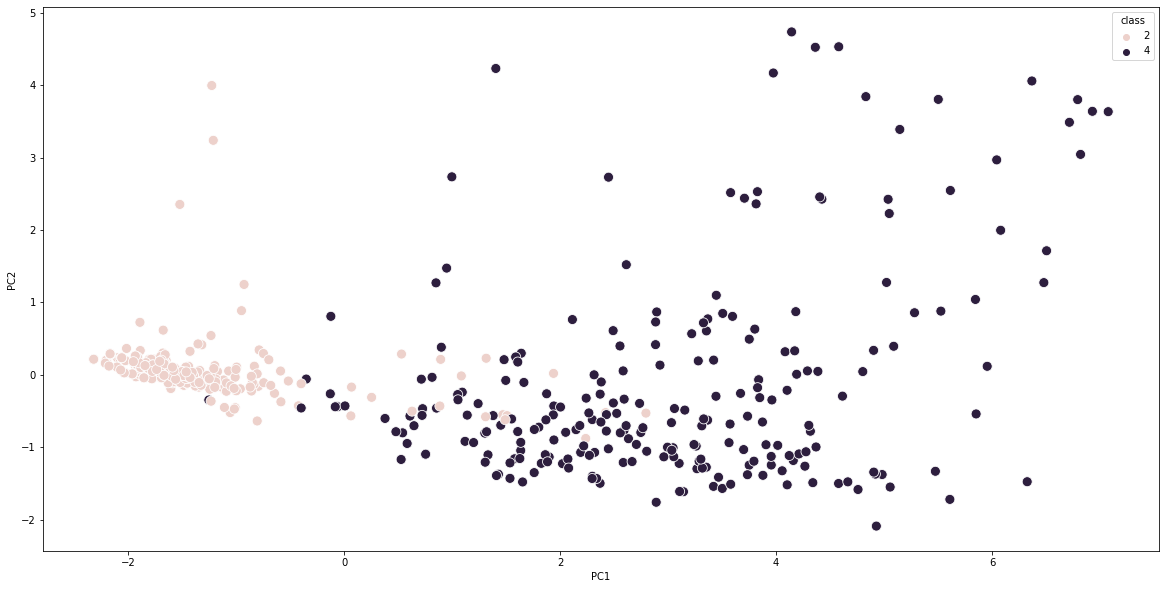

In [25]:
import seaborn as sns

plt.figure(figsize=(20, 10))
ax = sns.scatterplot(X_reduced[:,0], X_reduced[:,1], hue=y, s=100)
ax.set(xlabel='PC1', ylabel='PC2')
plt.show()

### 랜덤 PCA

In [26]:
pca = PCA(n_components = 2, svd_solver='randomized')
X_random = pca.fit_transform(X_scaled)

In [27]:
pca.components_

array([[ 0.30327434,  0.38139476,  0.37789713,  0.33280777,  0.33664797,
         0.33286015,  0.34492741,  0.33576637,  0.23055098],
       [-0.15199451, -0.0495235 , -0.08633347, -0.04226448,  0.16478284,
        -0.25006174, -0.22939596,  0.02836101,  0.90669412]])

In [28]:
pca.explained_variance_ratio_

array([0.65322102, 0.08590219])

In [29]:
X_random[:5]

array([[-1.4541711 , -0.11401214],
       [ 1.46845176, -0.54984684],
       [-1.57770004, -0.07511858],
       [ 1.50835316, -0.56240928],
       [-1.32867875, -0.08961779]])

## 다차원 척도법

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [31]:
protein = pd.read_csv('data/protein.csv')
protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [32]:
X = protein.drop(['Country'], axis=1)
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [33]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
mds = MDS(n_components = 2)
X_2d = mds.fit_transform(X_scaled)

In [35]:
X_2d

array([[ 0.69853868, -1.05627246],
       [-0.45155669,  0.25717669],
       [-0.33494411,  0.30433537],
       [ 0.81248769, -0.61094618],
       [-0.05555218,  0.16311604],
       [-0.81917622,  0.15911455],
       [-0.43678738,  0.55986362],
       [-0.57658125, -0.66616534],
       [-0.21517117,  0.7505053 ],
       [ 0.97405364,  0.14081997],
       [ 0.45899647, -0.1344965 ],
       [-0.85272356,  0.03696355],
       [ 0.57150076,  0.12469781],
       [-0.52473062,  0.1837796 ],
       [-0.3803663 , -0.47453327],
       [ 0.12163415,  0.4363625 ],
       [ 0.80206151,  1.00890635],
       [ 0.63988025, -0.51911481],
       [ 0.63310007,  0.59698494],
       [-0.56122355, -0.258272  ],
       [-0.22020553, -0.04965301],
       [-0.77211277, -0.30305199],
       [ 0.13032252, -0.49758988],
       [-0.59510637,  0.3563574 ],
       [ 0.95366197, -0.50888828]])

In [36]:
X_r = pd.DataFrame(X_2d)

In [37]:
X_r['Country'] = protein['Country']

In [38]:
X_r.head()

,0,1,Country
0,0.698539,-1.056272,Albania
1,-0.451557,0.257177,Austria
2,-0.334944,0.304335,Belgium
3,0.812488,-0.610946,Bulgaria
4,-0.055552,0.163116,Czechoslovakia


C:\venvs\datam\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


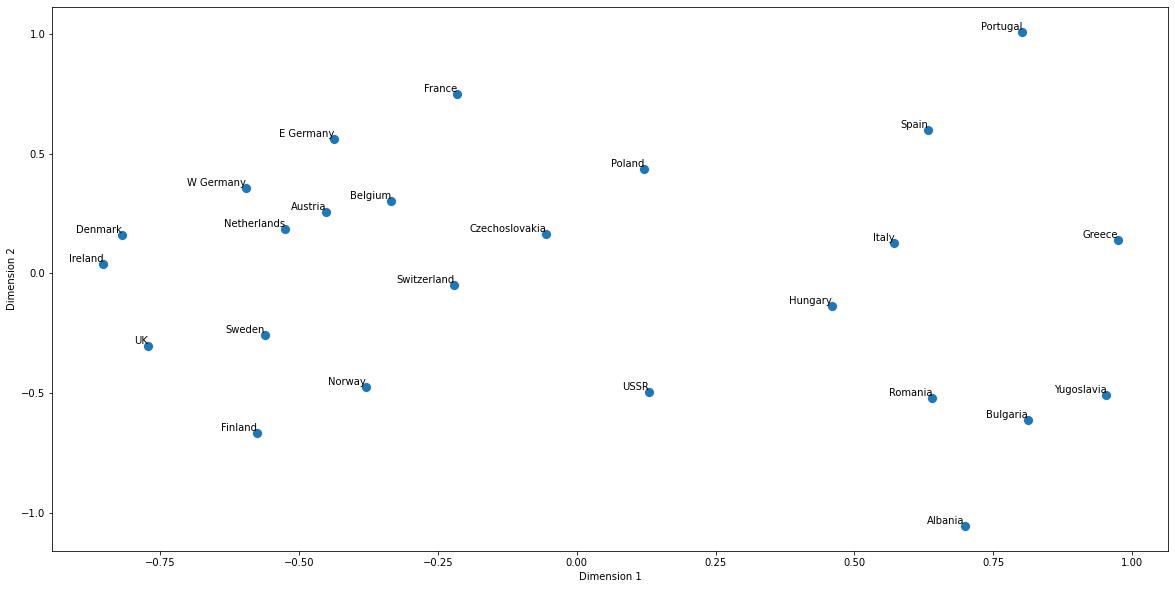

In [39]:
import seaborn as sns

plt.figure(figsize=(20, 10))
ax = sns.scatterplot(X_r[0], X_r[1], s=100)
ax.set(xlabel='Dimension 1', ylabel='Dimension 2')

# label points on the plot
x = X_r[0]
y = X_r[1]
names = X_r['Country']

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(x,y,names)]

plt.show()

### 위의 예를 PCA로도 수행

In [40]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_scaled)

In [41]:
X_pca = pd.DataFrame(X_reduced)
X_pca['Country'] = protein['Country']
X_pca.head()

,0,1,Country
0,0.970745,-0.447788,Albania
1,-0.426424,-0.266672,Austria
2,-0.435920,0.062134,Belgium
3,0.853018,-0.367135,Bulgaria
4,-0.148997,-0.160445,Czechoslovakia


C:\venvs\datam\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


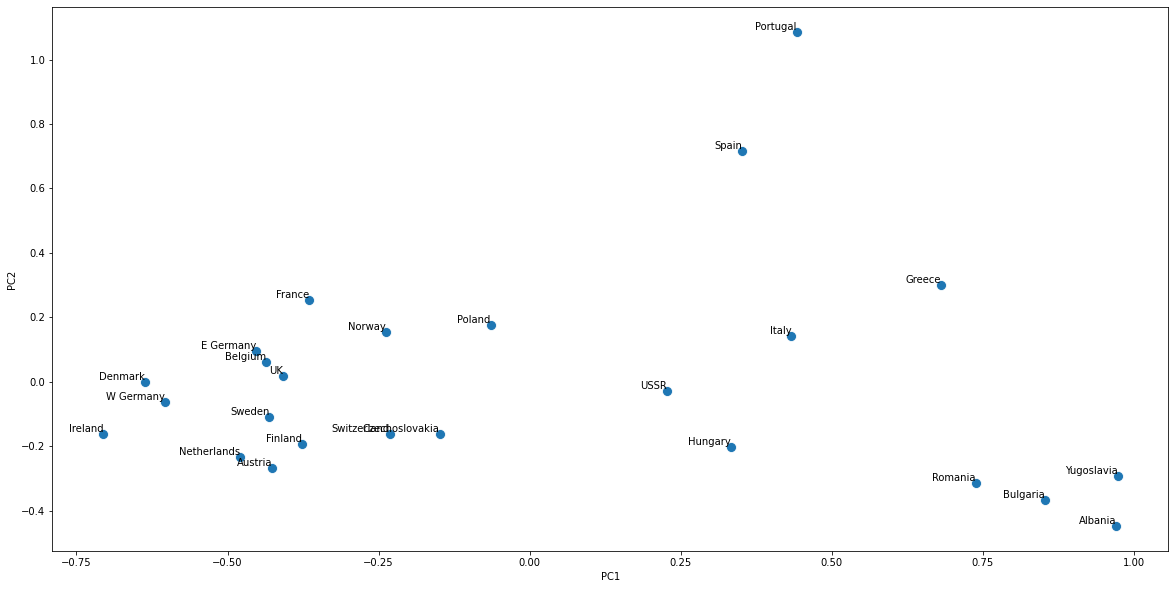

In [42]:
plt.figure(figsize=(20, 10))
ax = sns.scatterplot(X_pca[0], X_pca[1], s=100)
ax.set(xlabel='PC1', ylabel='PC2')

x = X_pca[0]
y = X_pca[1]
names = X_pca['Country']

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(x,y,names)]

plt.show()

## 연습문제

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [44]:
speakers = pd.read_csv('data/senti_final_T.csv')
speakers.head()

,category,Design,Price,Sound,Portability,Voice Recognition,App Control,Music,Information,Convenience
0,sk,0.495841,0.549718,0.484794,0.479233,0.521475,0.481672,0.524000,0.534306,0.525793
1,naver,0.368778,0.412791,0.313043,0.360215,0.347552,0.330769,0.380573,0.354140,0.374868
2,lg,0.642412,0.000000,0.000000,0.000000,0.636905,0.616185,0.701408,0.650108,0.635185
3,kt,0.503263,0.563762,0.506127,0.500531,0.536781,0.528256,0.532591,0.543436,0.541343
4,kakao,0.461356,0.493343,0.430045,0.321945,0.000000,0.483298,0.516645,0.525242,0.487525


In [45]:
speakers_value = speakers.drop(['category'], axis=1)

### PCA

In [46]:
pca = PCA(n_components = 2)
speakers_pca = pca.fit_transform(speakers_value)

In [47]:
df = pd.DataFrame(speakers_pca)
df['category'] = speakers['category']
df.head()

,0,1,category
0,-0.168682,-0.214316,sk
1,-0.157197,0.137751,naver
2,0.737731,0.019685,lg
3,-0.175304,-0.254137,kt
4,-0.236548,0.311017,kakao


C:\venvs\datam\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


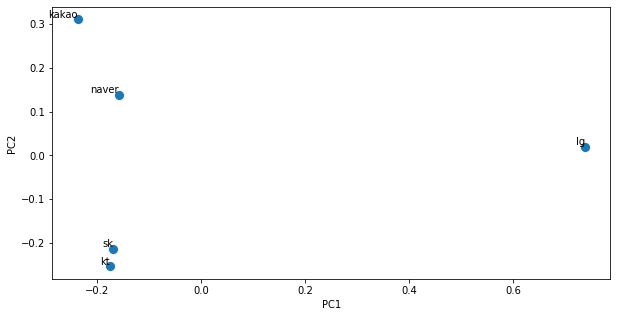

In [48]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(df[0], df[1], s=100)
ax.set(xlabel='PC1', ylabel='PC2')

x = df[0]
y = df[1]
names = df['category']

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(x,y,names)]

plt.show()

### MDS 

In [49]:
mds = MDS(n_components = 2)
speakers_mds = mds.fit_transform(speakers_value)

In [50]:
df = pd.DataFrame(speakers_mds)
df['category'] = speakers['category']
df.head()

,0,1,category
0,-0.266143,0.021866,sk
1,0.196463,0.166887,naver
2,0.379282,-0.642606,lg
3,-0.306556,-0.014067,kt
4,-0.003046,0.467920,kakao


C:\venvs\datam\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


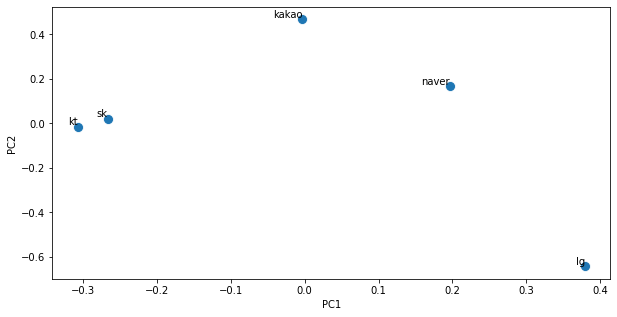

In [51]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(df[0], df[1], s=100)
ax.set(xlabel='PC1', ylabel='PC2')

x = df[0]
y = df[1]
names = df['category']

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(x,y,names)]

plt.show()